# 加载路透社数据集

In [96]:
from keras.datasets import reuters

In [97]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
# 与IMDB一样，每个样本都是一个整数列表

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
# 将索引解码为单词

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

540672/550378 [============================>.] - ETA: 0s

In [9]:
# 样本对应的标签是0-45范围内的整数，即话题索引编号

In [10]:
train_labels[10]

3

# 准备数据

In [49]:
# 数据向量化

In [100]:
import numpy as np

In [101]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

In [102]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [53]:
# 还可以使用one-hot编码

In [59]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [60]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [63]:
# Keras内置方法同样可以实现

In [98]:
from keras.utils.np_utils import to_categorical

In [99]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# 构建网络

In [103]:
from keras import layers
from keras import models

In [104]:
model = models.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 编译模型

In [24]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 验证集

In [25]:
# 在训练数据中留出1000个样本用于作为验证集

In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [27]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# 训练

In [28]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s - loss: 2.5237 - acc: 0.4987 - val_loss: 1.7171 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s - loss: 1.4430 - acc: 0.6891 - val_loss: 1.3503 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s - loss: 1.0983 - acc: 0.7645 - val_loss: 1.1756 - val_acc: 0.7400
Epoch 4/20
7982/7982 [==============================] - 1s - loss: 0.8725 - acc: 0.8167 - val_loss: 1.0814 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s - loss: 0.7060 - acc: 0.8485 - val_loss: 0.9881 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s - loss: 0.5694 - acc: 0.8796 - val_loss: 0.9416 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s - loss: 0.4627 - acc: 0.9034 - val_loss: 0.9091 - val_acc: 0.8000
Epoch 8/20
7982/7982 [==============================] - 1s - loss: 0.3728 - a

# 绘制训练损失和验证损失

In [29]:
import matplotlib.pyplot as plt

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [31]:
epochs = range(1, len(loss) + 1)

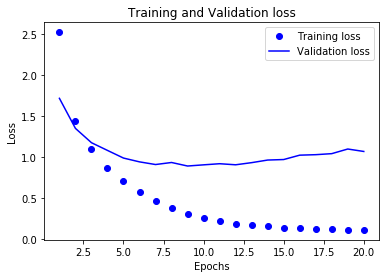

In [33]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制训练精度和验证精度

In [34]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [38]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']

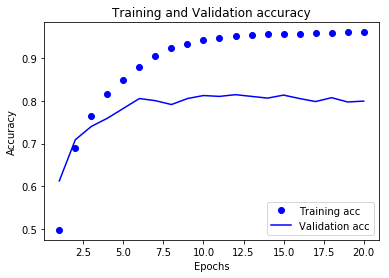

In [40]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 网络在9轮后开始过拟合，所以我们从头训练一个新的网络，共9个轮次

In [105]:
model = models.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=46, activation='softmax'))

In [106]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [122]:
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s - loss: 0.0935 - acc: 0.9582 - val_loss: 1.2060 - val_acc: 0.7970
Epoch 2/9
7982/7982 [==============================] - 1s - loss: 0.0950 - acc: 0.9594 - val_loss: 1.1939 - val_acc: 0.8000
Epoch 3/9
7982/7982 [==============================] - 1s - loss: 0.0915 - acc: 0.9592 - val_loss: 1.2663 - val_acc: 0.7920
Epoch 4/9
7982/7982 [==============================] - 1s - loss: 0.0937 - acc: 0.9568 - val_loss: 1.1986 - val_acc: 0.7960
Epoch 5/9
7982/7982 [==============================] - 1s - loss: 0.0897 - acc: 0.9612 - val_loss: 1.2199 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 1s - loss: 0.0930 - acc: 0.9582 - val_loss: 1.1838 - val_acc: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s - loss: 0.0906 - acc: 0.9587 - val_loss: 1.3221 - val_acc: 0.7830
Epoch 8/9
7982/7982 [==============================] - 1s - loss: 0.0892 - acc: 0.95

In [123]:
results = model.evaluate(x_test, one_hot_test_labels)

2048/2246 [==========================>...] - ETA: 0s

In [124]:
results

[1.4371341077323907, 0.7747105966692829]

In [121]:
# 随机分类器精度

In [73]:
import copy

In [74]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [75]:
float(np.sum(hits_array)) / len(test_labels)

0.19056099732858414

In [76]:
# 随机分类器准确率大概为19%

# 在新数据上生成预测结果

In [77]:
predictions = model.predict(x_test)

In [78]:
predictions[0].shape

(46,)

In [79]:
np.sum(predictions[0])

1.0000001

In [80]:
np.argmax(predictions[0])

3

In [81]:
y_train = np.array(train_labels)

In [82]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)